# Proyecto final PDS
## Juan Pablo Henao Echeverri
## C.c: 1036957601

###### 1. Cree las ventanas correspondientes para implementar en un filtro, pero a la hamming en vez de ser cos, es sin

In [85]:
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
#from ztrans import *
%matplotlib inline

def choose_windows(name='Hammingm', N=20):
    # Rect/Hanning/Hamming
    if name == 'Hammingm':
        window = np.array([0.54 - 0.46 * np.sin(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Hanning':
        window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Rect':
        window = np.ones(N)
    elif name == 'black':
        window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return window

###### 2. Diseñe el siguiente filtro Pasa–banda, fc1=196Hz, fc2=657Hz, fs=16kHz, BW=200Hz, AdB=0

In [86]:
fc1=196
fc2 = 657
fs=16000 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles
N = 512 # Numero de puntos de la FFT
BW=200 # Ancho de banda en la banda de transicion

wc1 = 2*np.pi*fc1/fs # frecuencia de corte normalizada en radianes
wc2 = 2*np.pi*fc2/fs

bwn=BW/fs # ancho de banda  normalizado en radianes

M=int(4/bwn) # orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M,M)

Orden del filtro:  320


In [89]:
h1 = ((wc2)/np.pi * np.sinc(wc2*(n)/np.pi)) - ((wc1)/np.pi * np.sinc(wc1*(n)/np.pi)) # Respuesta del filtro ideal 
h1[n==0]=(wc2-wc1)/np.pi # cuando es pasabanda


w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

win2 = choose_windows(name='Hammingm', N=len(n))

h2=h1*win2 # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2=h2*A # Ganancia del filtro
w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

Text(0, 0.5, '$|H2(\\omega)| $')

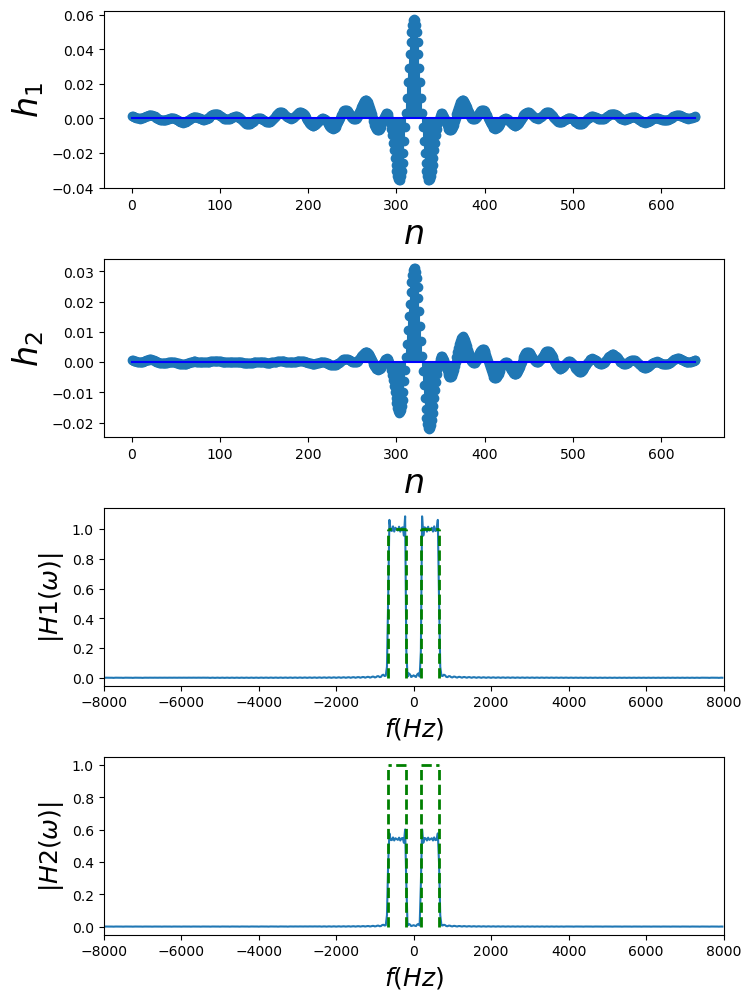

In [90]:
fig1,axs1 = subplots(4,1)
fig1.set_size_inches((8,12))
subplots_adjust(hspace=0.4)

ax=axs1[0]
ax.stem(n+M,h1,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_1$",fontsize=24)

ax=axs1[1]
ax.stem(n+M,h2,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_2$",fontsize=24)

ax=axs1[2]
ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([fc1,fc2],0,1,color='g',lw=2.,linestyle='--')
ax.vlines([-fc1,-fc2],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,fc1,fc2,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc1,-fc2,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

ax=axs1[3]
ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([fc1,fc2],0,1,color='g',lw=2.,linestyle='--')
ax.vlines([-fc1,-fc2],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,fc1,fc2,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc1,-fc2,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)

Es importante deseñar el filtro desde se definición en el tiempo, la cual es la señal sinusoidal sobre so argumento, para que en el momento de ir a la respuesta en frecuencia, la señal tome la forma del filtro pasa bandas.

Ademas al implementar la ventana hamming se reduce el ruido en la respuesta de frecuencia, esto se debe a que la señal en el tiempo se atenuan los extremos.
Pero como se modificó, se puede que se atenua la mitad de la respuesta en el tiempo, por lo que la amplitud en la respuesta de frecuencia baja a la mitad.

###### 3. Cargue la señal  de la carpeta

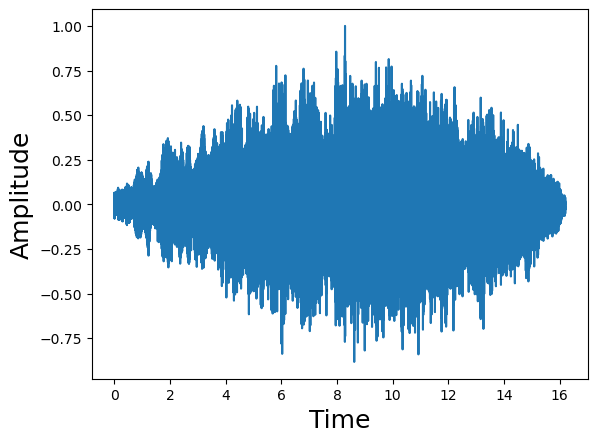

48000


In [34]:
import numpy as np
import matplotlib.pyplot as plt # libreria usada para grafica
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
file_audio=('instrumento.wav') # Ruta del archivo con la senal
fs1, x=read(file_audio) # Cargar el archivofs=
x=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs1, 1.0/fs1) # Vector de tiempo
plt.plot(t,x) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica
print(fs1)
Audio(x, rate=fs) # para escuchar la senal, si se desea

Se puede escuchar varios instrumentos que a medida que pasa el tiempo se van sumando, esto se ve como un aumento de volumen, por lo que la señal, aumenta en amplitud

###### 4. Diseñe un filtro FIR pasa-bajas con una banda pasante de 200Hz

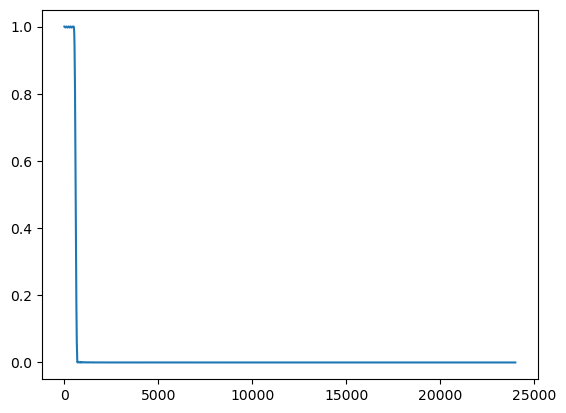

In [38]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs1 / 2.0
roll_off = 200.0
cutoff_hz = 600.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.

N, _= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.

taps = firwin(N, cutoff_hz/nyq_rate, pass_zero=True)

w, h = signal.freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h))

###### 5. Filtre la señal dada con el filtro diseñado

In [39]:
filtered_x = lfilter(taps, 1.0, x)

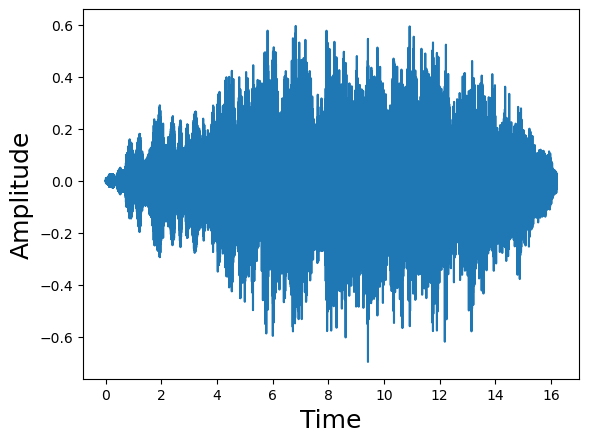

In [40]:
t=np.arange(0, float(len(filtered_x))/fs1, 1.0/fs1) # Vector de tiempo
plt.plot(t,filtered_x) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica
Audio(filtered_x, rate=fs1) # para escuchar la senal, si se desea

Se puede escuchar que solo se sienten notas graves, ya no se escuchan los violines, por lo que la nota que estaban sonando debe estar por encima de los 200Hz

###### 6. Aumente la frecuencia de corte  a 2000 Hz y haga los proceso anteriores

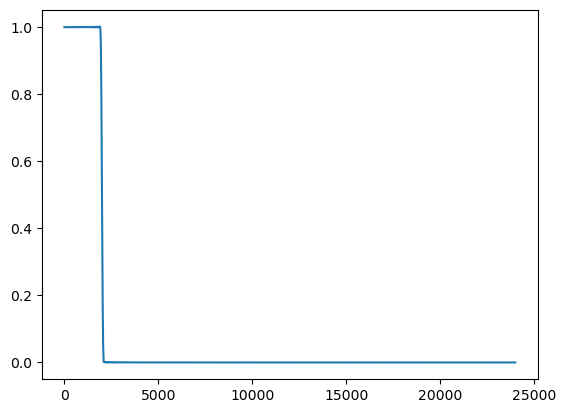

In [79]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs1 / 2.0
roll_off = 200.0
cutoff_hz = 2000.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.

N, _= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.

taps1 = firwin(N, cutoff_hz/nyq_rate, pass_zero=True)

w, h = signal.freqz(taps1, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h))

In [80]:
filtered_x1 = lfilter(taps1, 1.0, x)

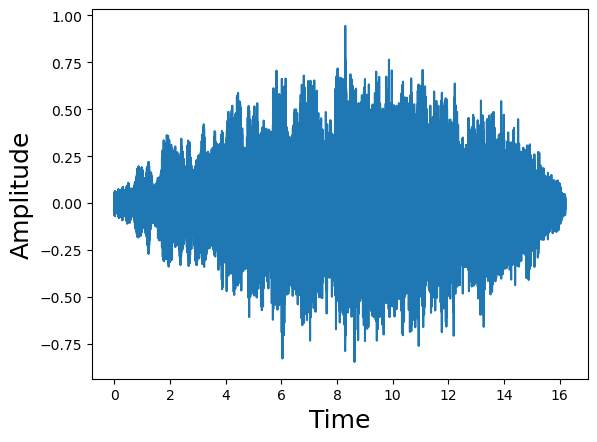

In [81]:

t=np.arange(0, float(len(filtered_x1))/fs1, 1.0/fs1) # Vector de tiempo
plt.plot(t,filtered_x1) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica
Audio(filtered_x1, rate=fs1) # para escuchar la senal, si se desea

Se pueden escuchar mas instrumentos musicales, ya que hay mas rangos de frecuencia

###### 7. Grafique la señal antes y despues de ser filtrada con pasa bajas, pasa altas, pasa bandas y rechaza bandas

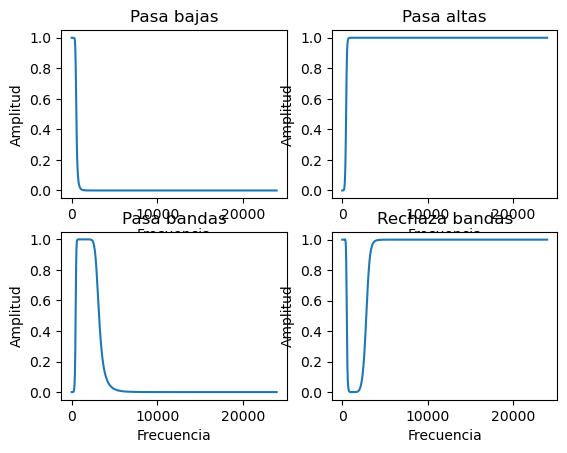

In [101]:
import scipy.signal as sp
wc = 1000/fs1
b, a = sp.butter(6, wc, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a);



b1, a1 = sp.butter(6, wc, btype='high', analog=False, output='ba', fs=None)
wb1, Hb1 = sp.freqz(b1, a1);


wc = [1000/fs1, 6000/fs1]
b2, a2 = sp.butter(6, wc, btype='bandpass', analog=False, output='ba', fs=None)
wb2, Hb2 = sp.freqz(b2, a2);


b3, a3 = sp.butter(6, wc, btype='bandstop', analog=False, output='ba', fs=None)
wb3, Hb3 = sp.freqz(b3, a3);


fig, axs = plt.subplots(2, 2)
axs[0, 0].plot((wb*fs1)/(2*np.pi), np.abs(Hb))
axs[0, 0].set_title('Pasa bajas')
axs[0, 1].plot((wb1*fs1)/(2*np.pi), np.abs(Hb1))
axs[0, 1].set_title('Pasa altas')
axs[1, 0].plot((wb2*fs1)/(2*np.pi), np.abs(Hb2))
axs[1, 0].set_title('Pasa bandas')
axs[1, 1].plot((wb3*fs1)/(2*np.pi), np.abs(Hb3))
axs[1, 1].set_title('Rechaza bandas')

for ax in axs.flat:
    ax.set(xlabel='Frecuencia', ylabel='Amplitud')

En las graficas anteriores se pueden observar los 4 filtros necesarios.

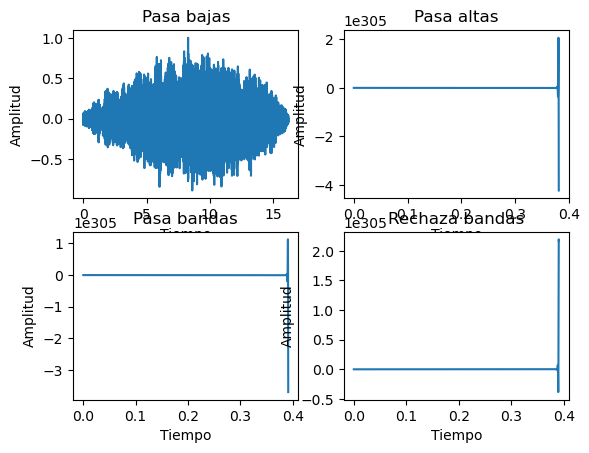

In [100]:
y = sp.lfilter(b, a, x)
y1 = sp.lfilter(b1, a2, x)
y2 = sp.lfilter(b2, a2, x)
y3 = sp.lfilter(b3, a3, x)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t,y)
axs[0, 0].set_title('Pasa bajas')
axs[0, 1].plot(t,y1)
axs[0, 1].set_title('Pasa altas')
axs[1, 0].plot(t,y2)
axs[1, 0].set_title('Pasa bandas')
axs[1, 1].plot(t,y3)
axs[1, 1].set_title('Rechaza bandas')

for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Amplitud')

Se puede obervar como la señal en el pasa bajas pasa completamente ya que la frecuencia de corte muestra permite pasar gran cantidad.  En el pasa altas solo pasan ciertos sonidos al final, y lo mismo en el pasa bandas y en el rechaza bandas, por lo que se puede intuir que los instrumentos que esta´n por encima de esas frecuencia de corte del pasa bajas, esta´n por encima de 6000 Hz